### Explore Bike Share Data

For this project, our goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York. 

In [125]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [126]:
head(ny)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
2,4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
3,2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
4,3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
5,6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
6,1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [127]:
head(wash)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
2,482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
3,1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
4,665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
5,1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
6,1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [128]:
head(chi)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
2,955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
3,9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
4,304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
5,45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
6,1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### Question 1


**What are the most common hours of use and dismount?**

This question is seeking clarity on what the most common start and end times are for biking sessions. This can enlighten us on when the "rush hours" are. We'll do this by extracting the hour out of the `Start.Time` and `End.Time` fields, then simply see which number is the most prevalent. It is not specified if the timezone is local for the timestamps, so it is assumed that they are.

In [129]:
# Setting text size and loading ggplot
library(ggplot2)
theme_set(theme_minimal(22))

In [130]:
Modes <- function(x) {
  ux <- unique(x)
  tab <- tabulate(match(x, ux))
  ux[tab == max(tab)]
}

# thanks, StackOverflow (Ken Williams) - https://stackoverflow.com/questions/2547402/how-to-find-the-statistical-mode

Now that we can calculate the mode, lets apply it to our start and end times for NYC. We'll also check our results out.

In [131]:
ny_start <- as.integer(substr(ny$Start.Time, 11, 13))  # index of hour portion of timestamp string
ny_end <- as.integer(substr(ny$End.Time, 11, 13))

# Calculate the statistical mode, getting the most frequent hour (24hr format)
Modes(ny_start)
Modes(ny_end)

[1] 17

[1] 18

Now lets do that for the rest of the cities

In [132]:
wash_start <- as.integer(substr(wash$Start.Time, 11, 13))  # index of hour portion of string
wash_end <- as.integer(substr(wash$End.Time, 11, 13))
Modes(wash_start)
Modes(wash_end)

[1] 8

[1] 8

In [133]:
chi_start <- as.integer(substr(chi$Start.Time, 11, 13))  # index of hour portion of string
chi_end <- as.integer(substr(chi$End.Time, 11, 13))
Modes(chi_start)
Modes(chi_end)

[1] 17

[1] 17

I think a helpful way to visualize these results might be a bar chart, since the data is categorical/discrete in both axes. We'll get our data into an easy-to-use format by instantiating some simple `data.frames`.

In [134]:
start_df <- data.frame (
    city = c("NewYorkCity", "WashingtonDC", "Chicago"),
    mode = c(Modes(ny_start), Modes(wash_start), Modes(chi_start))
)

end_df <- data.frame (
    city = c("NewYorkCity", "WashingtonDC", "Chicago"),
    mode = c(Modes(ny_end), Modes(wash_end), Modes(chi_end))
)

In [135]:
# Here is what those simple data frames look like
start_df
end_df

city,mode
<chr>,<int>
NewYorkCity,17
WashingtonDC,8
Chicago,17


city,mode
<chr>,<int>
NewYorkCity,18
WashingtonDC,8
Chicago,17


Now we can make our bar graphs

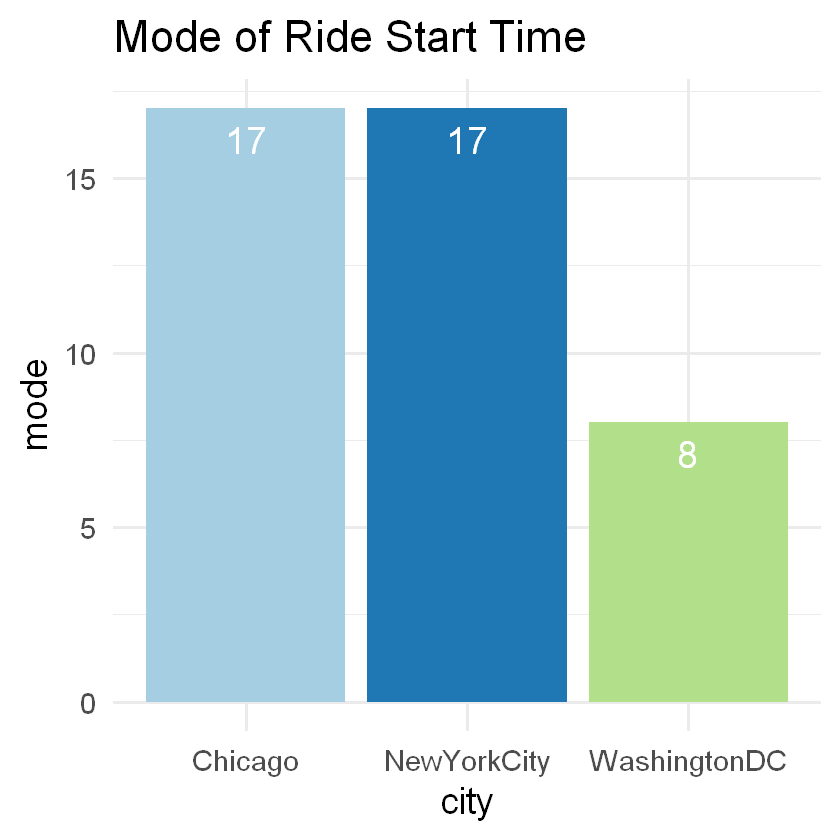

In [136]:
ggplot(aes(x=city, y=mode, fill=city), data=start_df) +
    ggtitle("Mode of Ride Start Time") +
    geom_bar(stat='identity', show.legend=FALSE) +
    scale_fill_brewer(palette='Paired') + # set color palette
    geom_text(aes(label=mode), vjust=1.6, color='white', size=8) # place number on bar
    
    

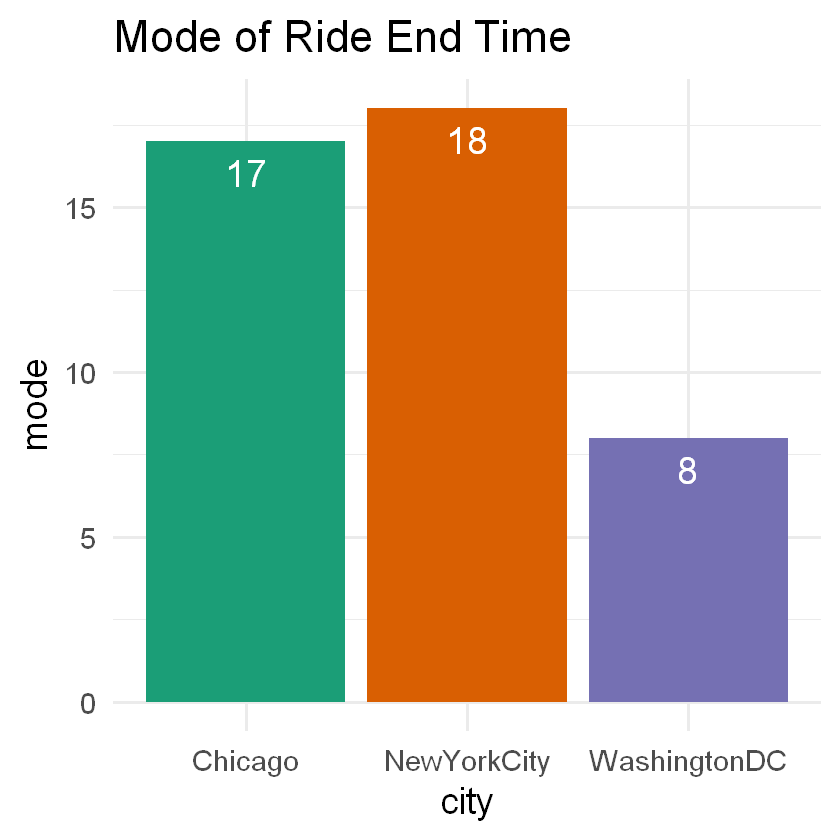

In [137]:
ggplot(aes(x=city, y=mode, fill=city), data=end_df) +
    geom_bar(stat='identity', show.legend=FALSE) +
    ggtitle("Mode of Ride End Time") +
    scale_fill_brewer(palette='Dark2') + 
    geom_text(aes(label=mode), vjust=1.6, color='white', size=8) 
    

**Summary for #1**

For question 1, we can observe that Chicago's modes for the start and end time were 17, NYC had 17 for start and 18 for end, and DC had 8 for both times.

This indicates that most sessions start by 5 PM local in Chicago and NYC and end around that same time, so in the evening rush hour. Meanwhile, DC seems to have more usage in the mornings, as indicated by the mode of 8 AM local.

### Question 2

**What are the mean and median for Trip.Duration?**

Thankfully, this can be easily calculated via the `summary()` function. Based on the output, as well as considering a 

In [138]:
summary(ny$Trip.Duration)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
     61.0     368.0     610.0     903.6    1051.0 1088634.0         1 

In [139]:
summary(wash$Trip.Duration)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
    60.27    410.89    706.99   1233.95   1233.22 904591.38         1 

In [140]:
summary(chi$Trip.Duration)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   60.0   394.2   670.0   937.2  1119.0 85408.0 

Note that the quartiles and median are all relatively close, but the maximum values for each is quite ridiculous. I wonder how many days those all are...

In [141]:
# Coverts seconds to minutes, then hours, then days and returns final result.
sec_to_days <- function(sec) {
    return (((sec / 60) / 60) / 24)
}

# Pass the maximum trip duration, ignoring NULLs
sec_to_days(max(ny$Trip.Duration, na.rm = TRUE))
sec_to_days(max(wash$Trip.Duration, na.rm = TRUE))
sec_to_days(max(chi$Trip.Duration, na.rm = TRUE))

[1] 12.59993

[1] 10.46981

[1] 0.9885185

Looking at some box plots, we see a significant number of outliers.

In [142]:
# Data frame for simplifying visualization creation
trips <- data.frame(
    city = c("NewYorkCity", "WashingtonDC", "Chicago"),
    trip_dur = c(ny$Trip.Duration, wash$Trip.Duration, chi$Trip.Duration)
)

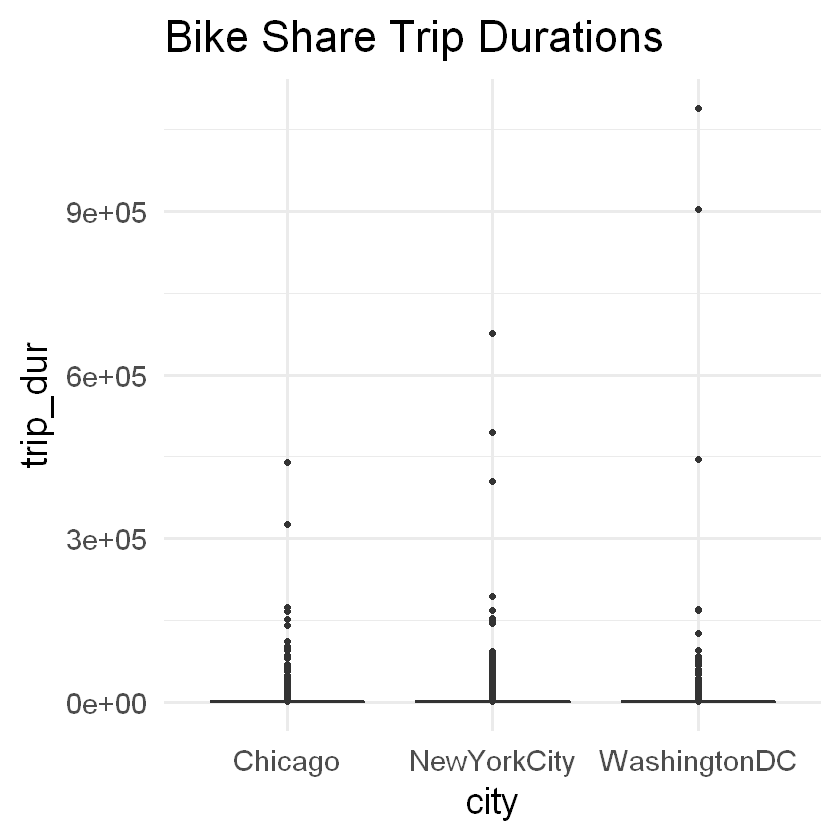

In [143]:
ggplot(aes(x=city, y=trip_dur), data=subset(trips, !is.na(trip_dur))) +
    ggtitle("Bike Share Trip Durations") +
    geom_boxplot()

Let's set some limits on the y-axis...

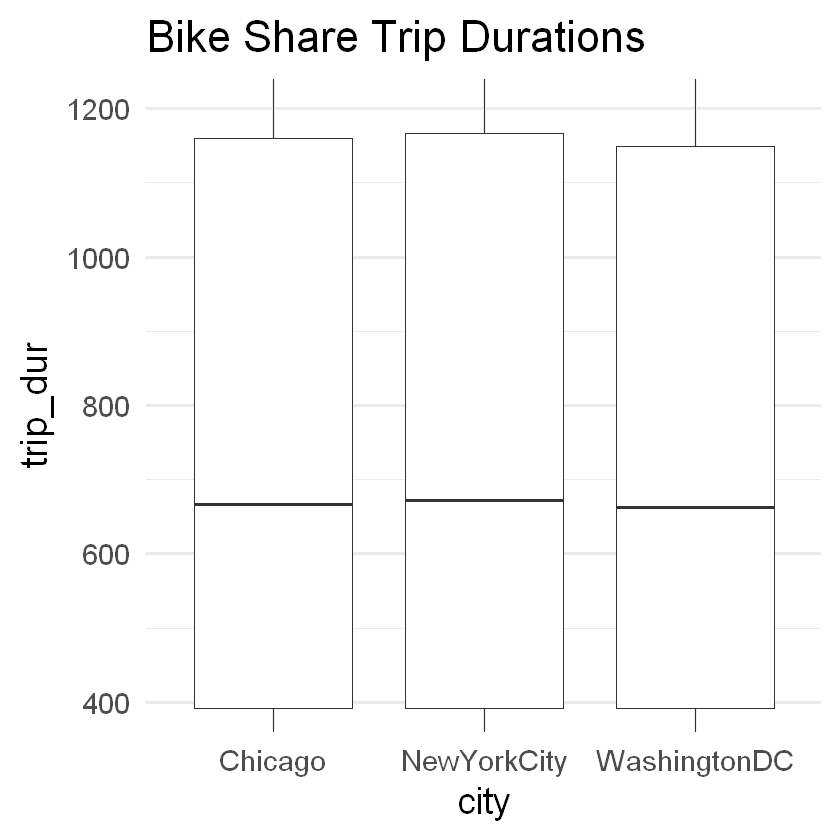

In [144]:
ggplot(aes(x=city, y=trip_dur), data=subset(trips, !is.na(trip_dur))) +
    ggtitle("Bike Share Trip Durations") +
    geom_boxplot() +
    coord_cartesian(ylim=c(400, 1200))

**Summary for #2**

We can see that the means for each of the different cities is in the 900s or 1200s. This is based on the number and magnitude of outliers that we see, such as the maximum trip duration being over 12.5 days in NYC. We can instead utilize the quartiles and median to get a better statistical reference compared to the average duration.

We see that the median trip duration is about 10-11 minutes (range of 610-707 seconds), and this remains the case across the 3 cities. We can also observe that over 75% of trips are below 20 minutes (1200 seconds). This could be useful when determining the average lifespan of a bike and planning maintenance schedules or factoring in related costs.

### Question 3

**Where are the most popular start and end stations?**

To get after this, we'll be taking the cross streets provided and using the `table()` function to essentially count the number of occurrences. Then, we'll sort the results in descending order to get the Top N.

Lets look at the most common station that users start from:

In [145]:
sort(table(ny$Start.Station), decreasing = TRUE)[1]
sort(table(wash$Start.Station), decreasing = TRUE)[1]
sort(table(chi$Start.Station), decreasing = TRUE)[1]

Pershing Square North 
                  592

Columbus Circle / Union Station 
                           1700

Streeter Dr & Grand Ave 
                    210

Now the most common end stations

In [146]:
sort(table(ny$End.Station), decreasing = TRUE)[1]
sort(table(wash$End.Station), decreasing = TRUE)[1]
sort(table(chi$End.Station), decreasing = TRUE)[1]

Pershing Square North 
                  556

Columbus Circle / Union Station 
                           1767

Streeter Dr & Grand Ave 
                    233

I'm also curious about the most common route. To look into that, we'll combine each row's start and end station string as a single string, then apply the same process as before.

In [147]:
# Combining the start and end columns into a single string
pair_ny <- table(paste(ny$Start.Station, ny$End.Station, sep = " -> "))
pair_wash <- table(paste(wash$Start.Station, wash$End.Station, sep = " -> "))
pair_chi <- table(paste(chi$Start.Station, chi$End.Station, sep = " -> "))

In [148]:
sort(pair_ny, decreasing = TRUE)[1]
sort(pair_wash, decreasing = TRUE)[1]
sort(pair_chi, decreasing = TRUE)[1]

E 7 St & Avenue A -> Cooper Square & E 7 St 
                                         33

Jefferson Dr & 14th St SW -> Jefferson Dr & 14th St SW 
                                                   198

Lake Shore Dr & Monroe St -> Streeter Dr & Grand Ave 
                                                  32

**Summary of #3**

We can see that the top start and end stations for each of the cities are the same. It makes sense that this would be the case, as the bikes are likely used to take someone from a high foot-traffic hub to wherever their individual destination is, then the reverse of that. We can also see that the cases for the most common start and stop combinations are not the same. For the most common route, it would be interesting to see if it's a single person or perhaps people who work at the same location/go to the same school, or if it's near common tourist destinations.

These results can be used to research each of the common stations, then similarities and differences can be observed between those stations. Lots of questions can follow reviewing this data, such as what makes a good station?